<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- $k$-means clustering
- Gaussian mixtures

<hr/>

<h1><font color="darkblue">Clustering</font></h1>

## Statistical Learning

- The methods in general fall in these 4 categories

>|                | Supervised     |         Unsupervised     |
 |:---------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |



## Clustering is ...
<img src="files/clusters.png" align=right width=200>

... the process of collecting a set of objects into groups or clusters of similar items

#### For example,

- Discover different species of birds based on their photographs
- Segment an image based on the pixel colors
- Organize news articles that cover the same story

<!--<img src="http://www.codeproject.com/KB/recipes/439890/clustering-process.png" width=450 align=left /> -->

## $k$-means clustering

A simple (flat) algorithm


In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [16]:
import warnings # ignore msg about mem leak in MKL on windows
warnings.filterwarnings('ignore', message='Kmeans') 

from sklearn.cluster import KMeans

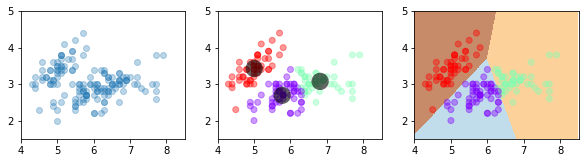

In [17]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2] 

# plotting
x_min, x_max = 4, 8.5
y_min, y_max = 1.5, 5

figure(figsize=(10,4)); 
ax=subplot(131,aspect='equal')
scatter(X[:,0],X[:,1], alpha=0.3);
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
C, L = kmeans.cluster_centers_, kmeans.labels_

ax=subplot(132,aspect='equal')
scatter(X[:,0],X[:,1],c=L,cmap=cm.rainbow,alpha=0.4)
scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.6,edgecolor='none')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

if True:
    h = .005 # point in the mesh [x_min, m_max]x[y_min, y_max].
    # Plot the decision boundary. For that, we will assign a color to each
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    P = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    P = P.reshape(xx.shape)

    # Put the result into a color plot
    ax=subplot(133,aspect='equal')
    plt.imshow(P, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='equal', origin='lower', alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=L, alpha=0.4, cmap=cm.rainbow)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

## Limitations

- Initialization matters

> Rerun multiple times: **n_init** (default=10) <br/>
> Smart(er) starting points

- Assumes spherical clusters (use of distance function)

> Preprocessing becomes important even in simple cases <br>
> For example, whitening...

## What $k$?

- How many clusters?

> Too many? <br/>
> Too few?

- Various diagnostics

> Check the minimum value of the cost function? <br/>
> Characterize the clusters - Gaussian? spherical?



## Example

- Run $k$-means on this [CSV](files/Class-Clusters.csv) file
- Try different parameters
- How many clusters did you find?

In [18]:
# Okay, you didn't see this because this generates the data
from scipy.stats import norm
np.random.seed(seed=1)
x1 = norm.rvs(0, 0.99, size=(3, 66)); x1[0,:] += 2.1
x2 = norm.rvs(0, 0.99, size=(3, 67)); x2[1,:] += 2.1
x3 = norm.rvs(0, 0.99, size=(3, 67)); x3[2,:] += 6
X = hstack((x1,x2,x3)).T.copy(order='C')
#savetxt("files/Class-Clusters.csv", X, delimiter=","); del X

(200, 3)

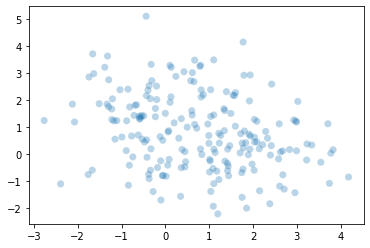

In [19]:
#X = loadtxt('files/Class-Clusters.csv', delimiter=',')
scatter(X[:,0],X[:,1],s=50,alpha=0.3,edgecolor='none');
X.shape

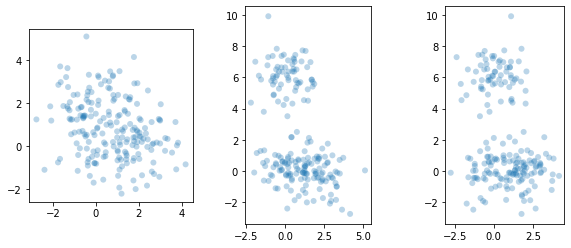

In [20]:
figure(figsize=(10,4))
for i,m,n in [(1,0,1),(2,1,2),(3,0,2)]:
    ax=subplot(1,3,i, aspect='equal')
    scatter(X[:,m],X[:,n],alpha=0.3, edgecolor='none');

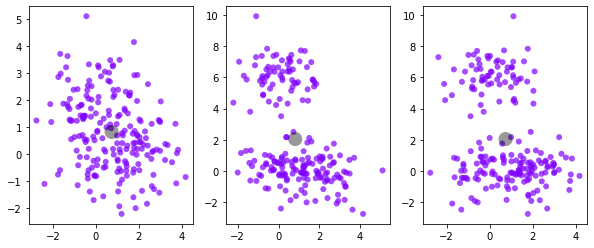

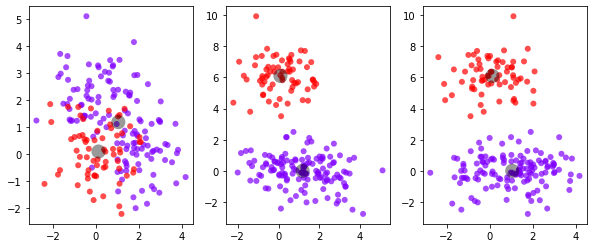

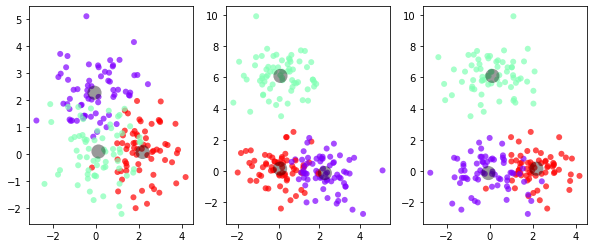

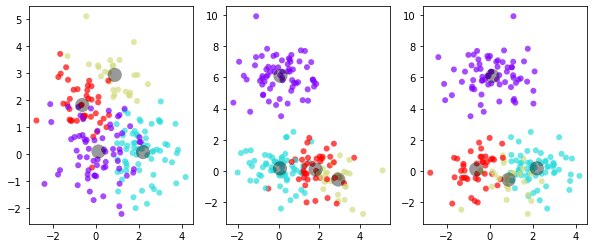

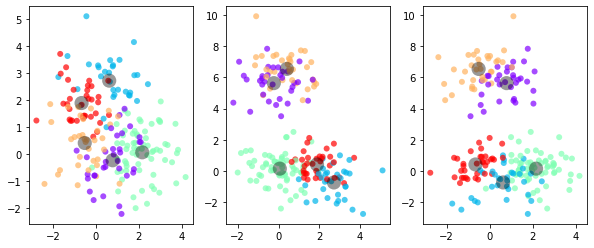

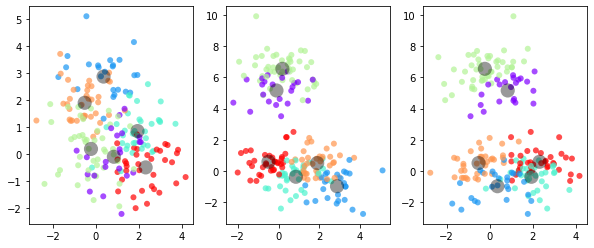

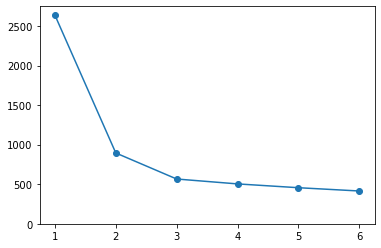

In [21]:
klist = []
ilist = []
for k in range(1,7):
    kmeans = KMeans(n_clusters=k, copy_x=False)
    kmeans.fit(X)
    klist.append(k)
    ilist.append(kmeans.inertia_) # cf. kmeans.score(X)
    if True:
        C, L = kmeans.cluster_centers_, kmeans.labels_
        figure(figsize=(10,4))
        for i,m,n in [(1,0,1),(2,1,2),(3,0,2)]:
            ax=subplot(1,3,i) #,aspect='equal')
            scatter(X[:,m],X[:,n],c=L,cmap=cm.rainbow, alpha=0.7, edgecolor='none');
            scatter(C[:,m],C[:,n],c='k',marker='o',s=200,alpha=0.4,edgecolor='none');
figure(); plot(klist,ilist,'o-'); plt.ylim(0,None);

## Gaussian Mixture Models

- A probabilistic approach to clustering

> Infer the parameters of $k$ **components**

- For example, a mixture of two Gaussians ($k\!=\!2$)

> **Parameters** $\boldsymbol{\theta}$ are $(\mu_1,\Sigma_1),\ (\mu_2,\Sigma_2)$ and the<br>
> cluster membership probabilities $\boldsymbol{\kappa}$ 


## GMM with $k=2$


- Difficult because of the unknown cluster memberships $\boldsymbol{\kappa}$

> $\kappa_i$ is the probability of that $x_i$ belongs to component 1 <br>
> $(1\!-\!\kappa_i)$ is the prob of belonging to component 2

- Likelihood function

>$\displaystyle L(\boldsymbol{\theta};\boldsymbol{x}) = \prod_{i=1}^n \Big[ \kappa_i\, G\left(x_i;\mu_1,\Sigma_1\right) + (1\!-\!\kappa_i)\, G\left(x_i; \mu_2,\Sigma_2\right)\Big]$

## Expectation-Maximization Algorithm

- The EM algorithm is a general framework

>1. Create an initial model $\theta$
>2. Find a better $\theta'$ s.t. <br> 
> the likelihood improves: $p(D\mid\theta') > p(D\mid\theta)$ <br/> 
> (or the posterior)
>3. Repeat until convergence


## Step-by-step
<img src=http://orig02.deviantart.net/e551/f/2012/098/9/a/3_easy_steps_to_draw_mona_lisa____by_mcdaotri21-d4vhuu2.png align=left width=450>

## E-step

- Estimate the membership probabilities $\boldsymbol{\kappa}$

> Based on the current model $(\mu_1,\mu_2,\Sigma_1,\Sigma_2)$ and data $\boldsymbol{x}$

## M-step

- Maximize the likelihood function  

> Based on the estimated membership probabilities $\boldsymbol{\kappa}$, obtain better $(\mu_1,\mu_2,\Sigma_1,\Sigma_2)$ estimates

- In spirit, this is not completely unlike $k$-means clustering algorithm

## Visual Example

<!--
<img src=https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif align=left>
-->

<img src=https://upload.wikimedia.org/wikipedia/commons/a/a7/Em_old_faithful.gif align=left width=400>

## Iris

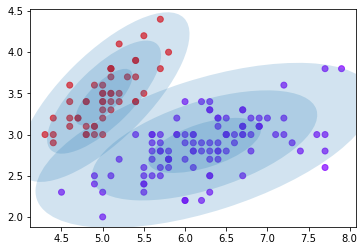

In [22]:
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from matplotlib.patches import Ellipse

iris = datasets.load_iris()
X = iris.data[:,:2] # only 2 features

gmm = GaussianMixture(n_components=2)
gmm.fit(X)
Cpred = gmm.predict(X)

ax = subplot(111, aspect='equal')
scatter(X[:,0], X[:,1], c=Cpred, cmap=cm.rainbow, alpha=0.7)

for n in arange(gmm.n_components): 
    cov = gmm.covariances_[n][:2,:2] 
    v, w = np.linalg.eigh(cov)
    angle = 180/pi * arctan2(w[0,1],w[0,0])
    for i in range(1,4): # of contours
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,:2], a[0],a[1], angle)
        ell.set_alpha(0.2)
        ax.add_artist(ell)

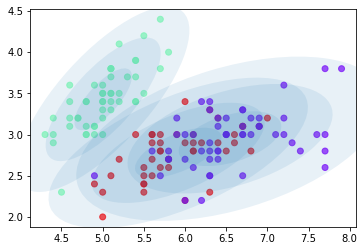

In [23]:
# cluster on all features w/ plotting another projection
X = iris.data[:,:] 

gmm = GaussianMixture(n_components=3)
gmm.fit(X)
Cpred = gmm.predict(X)

ax = subplot(111, aspect='equal')
if False: # coloring by the true class memberships
    scatter(X[:,0], X[:,1], c=iris.target, cmap=cm.rainbow, alpha=0.7) 
else:
    scatter(X[:,0], X[:,1], c=Cpred, cmap=cm.rainbow, alpha=0.7) 
    
for n in arange(gmm.n_components): 
    cov = gmm.covariances_[n][:2,:2] 
    v, w = np.linalg.eigh(cov)
    angle = 180/pi * arctan2(w[0,1],w[0,0])
    for i in range(1,4): # of contours
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,:2], a[0],a[1], angle)
        ell.set_alpha(0.1)
        ax.add_artist(ell)

In [24]:
gmm.covariances_[0].shape

(4, 4)

In [25]:
gmm.predict(X)[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [32]:
gmm.predict_proba(X)[-5:]

array([[1.00000000e+000, 1.13909773e-153, 6.34854022e-015],
       [9.99999996e-001, 3.44470050e-127, 3.89882319e-009],
       [9.99998293e-001, 1.32415691e-136, 1.70714861e-006],
       [1.00000000e+000, 1.15528127e-158, 2.14684273e-010],
       [9.97920609e-001, 2.52728969e-121, 2.07939062e-003]])

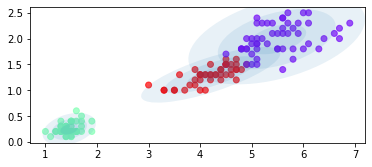

In [34]:
# plot another projections of the 4-D space
ax = subplot(111, aspect='equal')
if False: # coloring by the true class memberships
    scatter(X[:,2], X[:,3], c=iris.target, cmap=cm.rainbow, alpha=0.7) 
else:
    scatter(X[:,2], X[:,3], c=Cpred, cmap=cm.rainbow, alpha=0.7) 
    
for n in arange(gmm.n_components): 
    cov = gmm.covariances_[n][2:,2:] 
    v, w = np.linalg.eigh(cov)
    angle = 180/pi * arctan2(w[0,1],w[0,0])
    for i in range(1,4): # of contours
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,2:], a[0],a[1], angle)
        ell.set_alpha(0.1)
        ax.add_artist(ell)

## What Gaussian?

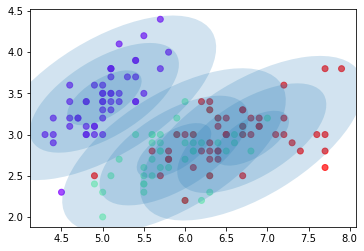

In [41]:
X = iris.data[:,:2]
ax = subplot(111, aspect='equal')
scatter(X[:,0], X[:,1], c=iris.target, cmap=cm.rainbow, alpha=0.7)

gmm = GaussianMixture(n_components=3, covariance_type='tied')
gmm.fit(X)

for n in arange(gmm.n_components): 
    if gmm.covariance_type == 'spherical': cov = eye(X.shape[1])*gmm.covariances_[n]
    elif gmm.covariance_type == 'full': cov = gmm.covariances_[n][:2, :2]
    elif gmm.covariance_type == 'tied': cov = gmm.covariances_[:2, :2]
    elif gmm.covariance_type == 'diag': cov = diag(gmm.covariances_[n][:2])
    v, w = np.linalg.eigh(cov)
    angle = 180/pi * arctan2(w[0,1],w[0,0])
    for i in range(1,4):
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,:2], a[0],a[1], angle)
        ell.set_alpha(0.2)
        ax.add_artist(ell)

## Decision Boundaries

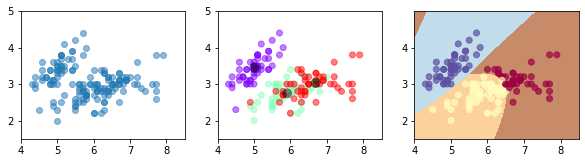

In [15]:
X = iris.data[:,:2] # only 2 features

gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)
C = gmm.means_

figure(figsize=(10,4)); 
ax=subplot(131,aspect='equal')
scatter(X[:,0],X[:,1], alpha=0.5);
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax=subplot(132,aspect='equal')
scatter(X[:,0],X[:,1],c=iris.target,cmap=cm.rainbow, alpha=0.5);
scatter(C[:,0],C[:,1],c='k',marker='o',s=100,alpha=0.5,edgecolor='none');
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

if True:
    h = .005 # point in the mesh [x_min, m_max]x[y_min, y_max].
    # Plot the decision boundary. For that, we will assign a color to each
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    P = gmm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Put the result into a color plot
    ax=subplot(133,aspect='equal')
    plt.imshow(P, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='equal', origin='lower', alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), alpha=0.7, cmap=cm.Spectral_r)

## Variants

<!--<img src=http://scikit-learn.org/stable/_images/sphx_glr_plot_gmm_covariances_0011.png align=left width=400>-->

<img src=files/plot_gmm_classifier_0011.png align=left width=400>


## Comparison

- Gaussian Mixture Model

> Find components with matching distribution

- $k$-means clustering

> Tends to yield spherical clusters with similar sizes

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/ClusterAnalysis_Mouse.svg/675px-ClusterAnalysis_Mouse.svg.png" width=600 align=left>

In [16]:
gmm.predict(X[:3])

array([0, 0, 0], dtype=int64)

In [17]:
gmm.predict_proba(X[:3])

array([[9.99241652e-01, 8.86653172e-05, 6.69682863e-04],
       [9.56075636e-01, 3.15129648e-02, 1.24113994e-02],
       [9.98923892e-01, 3.45273923e-04, 7.30834344e-04]])

In [18]:
gmm.score(X)

-1.4978006547501477

## Soft Clustering?

- GMM provides quality to each possible cluster membership

> Instead of just in/out, have the likelihoods for all


## More Clustering

- Read and learn about the following algorithms:

> Agglomerative clustering
> <br>
> DBSCAN

- Overview of clustering on sklearn

> Read more [here](http://scikit-learn.org/stable/modules/clustering.html)

## Next Topic

- Spectral Clustering!